In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing

data = pd.read_csv('data_clean.csv',error_bad_lines=False)
print('Dataset Shape: ', data.shape)
data.head(3)

Dataset Shape:  (999975, 9)


,OFNS_DESC,BORO_NM,X_COORD_CD,Y_COORD_CD,PATROL_BORO,Year,Month,Day,Hour
0,INTOXICATED/IMPAIRED DRIVING,QUEENS,1052307.0,160090.0,PATROL BORO QUEENS SOUTH,2017,12,6,23
1,HARRASSMENT 2,STATEN ISLAND,935268.0,134865.0,PATROL BORO STATEN ISLAND,2016,3,3,10
2,GRAND LARCENY,BROOKLYN,999684.0,199470.0,PATROL BORO BKLYN NORTH,2012,12,4,20


In [45]:
data['OFNS_DESC'].value_counts()

PETIT LARCENY                           167293
HARRASSMENT 2                           124734
ASSAULT 3 & RELATED OFFENSES            105873
CRIMINAL MISCHIEF & RELATED OF          100949
GRAND LARCENY                            85686
DANGEROUS DRUGS                          62778
OFF. AGNST PUB ORD SENSBLTY &            55585
FELONY ASSAULT                           38631
ROBBERY                                  36841
BURGLARY                                 34971
MISCELLANEOUS PENAL LAW                  25581
DANGEROUS WEAPONS                        23266
THEFT-FRAUD                              22432
OFFENSES AGAINST PUBLIC ADMINI           20006
LARCENY OF MOTOR VEHICLE                 17624
INTOXICATED/IMPAIRED DRIVING             14069
VEHICLE AND TRAFFIC LAWS                 12121
CRIMINAL TRESPASS                        11883
SEX CRIMES                               11380
FORGERY                                   9958
POSSESSION OF STOLEN PROPERTY             5297
UNAUTHORIZED 

In [46]:
data = data[data['OFNS_DESC'] != 'LOITERING FOR DRUG PURPOSES']

In [47]:
categories = data['OFNS_DESC'].unique()
category_dict = {value:index for index,value in enumerate(categories)}
y = data['OFNS_DESC'].map(category_dict)

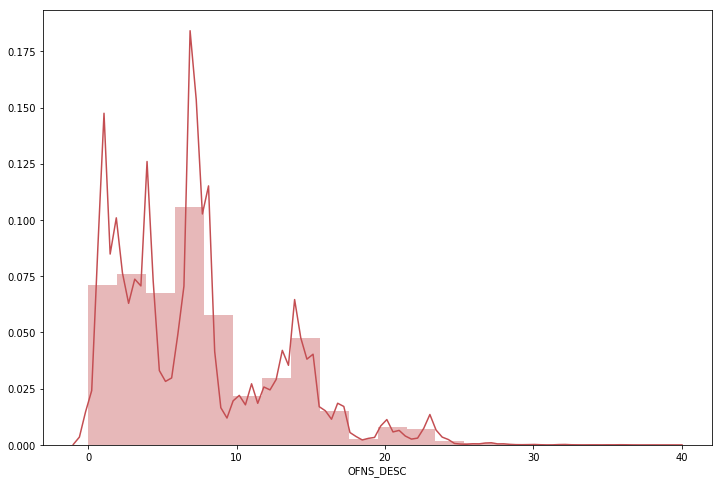

In [48]:
plt.figure(figsize=(12,8))
sns.set_color_codes()
sns.distplot(y,bins=20,kde=True,color='r')

In [49]:
category = preprocessing.LabelEncoder()
category_crime = category.fit_transform(data.OFNS_DESC)
print(category_crime)

[20 18 17 ... 17  8 20]


In [50]:
category.inverse_transform(category_crime)

array(['INTOXICATED/IMPAIRED DRIVING', 'HARRASSMENT 2', 'GRAND LARCENY',
       ..., 'GRAND LARCENY', 'CRIMINAL MISCHIEF & RELATED OF',
       'INTOXICATED/IMPAIRED DRIVING'], dtype=object)

In [51]:
category.classes_

array(['ADMINISTRATIVE CODE', 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED',
       'ALCOHOLIC BEVERAGE CONTROL LAW', 'ANTICIPATORY OFFENSES', 'ARSON',
       'ASSAULT 3 & RELATED OFFENSES', 'BURGLARY',
       'CHILD ABANDONMENT/NON SUPPORT', 'CRIMINAL MISCHIEF & RELATED OF',
       'CRIMINAL TRESPASS', 'DANGEROUS DRUGS', 'DANGEROUS WEAPONS',
       'DISRUPTION OF A RELIGIOUS SERV', 'ESCAPE 3', 'FELONY ASSAULT',
       'FORGERY', 'GAMBLING', 'GRAND LARCENY', 'HARRASSMENT 2',
       'HOMICIDE-NEGLIGENT', 'INTOXICATED/IMPAIRED DRIVING', 'KIDNAPPING',
       'KIDNAPPING & RELATED OFFENSES', 'LARCENY OF MOTOR VEHICLE',
       'LOITERING', 'MISCELLANEOUS PENAL LAW',
       'NYS LAWS-UNCLASSIFIED FELONY', 'OFF. AGNST PUB ORD SENSBLTY &',
       'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES RELATED TO CHILDREN',
       'PETIT LARCENY', 'POSSESSION OF STOLEN PROPERTY',
       'PROSTITUTION & RELATED OFFENSES', 'RAPE', 'ROBBERY', 'SEX CRIMES',
       'THEFT-FRAUD', 'UNAUTHORIZED USE OF A VEHICLE',
     

In [52]:
#feature normalization
def normalize(data): 
    data = (data - data.min()) / (data.max() - data.min())
    return data

data['X_COORD_CD'] = normalize(data.X_COORD_CD)
data['Y_COORD_CD'] = normalize(data.Y_COORD_CD)

In [53]:
#getting season : summer, fall, winter, spring from months column
def get_season(x):
    summer=0
    fall=0
    winter=0
    spring=0
    if (x in [5, 6, 7]):
        summer=1
    if (x in [8, 9, 10]):
        fall=1
    if (x in [11, 0, 1]):
        winter=1
    if (x in [2, 3, 4]):
        spring=1
    return summer, fall, winter, spring

In [54]:
def prepare_data(df):
    """
    Preprocessing Training/Testing Data 
    """
    feature_list=df.columns.tolist()  
    cleanData=df[feature_list]
    cleanData.index=range(len(df))
        
    print ("Creating season features...")
    cleanData["Summer"], cleanData["Fall"], cleanData["Winter"], cleanData["Spring"]=zip(*cleanData["Month"].apply(get_season))
    
    print("Creating X/Y feature...")
    xy_scaler = preprocessing.StandardScaler()
    xy_scaler.fit(cleanData[["X_COORD_CD","Y_COORD_CD"]])
    cleanData[["X_COORD_CD","Y_COORD_CD"]] = xy_scaler.transform(cleanData[["X_COORD_CD","Y_COORD_CD"]])
    #set outliers to 0
    cleanData["X_COORD_CD"]=cleanData["Y_COORD_CD"].apply(lambda x: 0 if abs(x)>5 else x)
    cleanData["X_COORD_CD"]=cleanData["Y_COORD_CD"].apply(lambda y: 0 if abs(y)>5 else y)  
    
    print ("Creating dummy variables...")
    #ADDR = pd.get_dummies(cleanData['PREM_TYP_DESC'],prefix='ADDR')
    PD = pd.get_dummies(cleanData['PATROL_BORO'], prefix='PD')
    Boro = pd.get_dummies(cleanData['BORO_NM'], prefix='BORO')
    Hour = pd.get_dummies(cleanData['Hour'],prefix='HOUR')
    Day = pd.get_dummies(cleanData['Day'],prefix='DAY')
    Month = pd.get_dummies(cleanData['Month'],prefix='MONTH')
    Year = pd.get_dummies(cleanData['Year'],prefix='YEAR')
    #VicRace = pd.get_dummies(cleanData['SUSP_RACE'],prefix='SUSP_RACE')
    #VicSex = pd.get_dummies(cleanData['SUSP_SEX'],prefix='SUSP_SEX')
    #PREM_TYP_DESC = pd.get_dummies(cleanData['PREM_TYP_DESC'],prefix='PREM_TYP_DESC')


    
    feature_list=cleanData.columns.tolist()
    
    print ("Joining features...")
    features = pd.concat([cleanData[feature_list],PD, Boro, Hour,Day,Month,Year],axis=1)
    
    print ("Droping processed columns...")
    cleanFeatures=features.drop(["OFNS_DESC","BORO_NM", "PATROL_BORO", "Hour","Day","Month","Year","Month"],\
                                axis=1,inplace=False)
    
    print('Done!')
    
    return cleanFeatures

In [55]:
features = prepare_data(data)
features['crime'] = category_crime

Creating season features...
Creating X/Y feature...
Creating dummy variables...
Joining features...
Droping processed columns...
Done!


In [56]:
features.head()

,X_COORD_CD,Y_COORD_CD,Summer,Fall,Winter,Spring,PD_PATROL BORO BKLYN NORTH,PD_PATROL BORO BKLYN SOUTH,PD_PATROL BORO BRONX,PD_PATROL BORO MAN NORTH,...,YEAR_2010,YEAR_2011,YEAR_2012,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016,YEAR_2017,YEAR_2018,crime
0,-1.427437,-1.427437,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,20
1,-2.194504,-2.194504,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,18
2,-0.229931,-0.229931,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,17
3,0.604401,0.604401,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,10
4,0.730476,0.730476,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,5


In [57]:
collist=features.columns.tolist()
collist

['X_COORD_CD',
 'Y_COORD_CD',
 'Summer',
 'Fall',
 'Winter',
 'Spring',
 'PD_PATROL BORO BKLYN NORTH',
 'PD_PATROL BORO BKLYN SOUTH',
 'PD_PATROL BORO BRONX',
 'PD_PATROL BORO MAN NORTH',
 'PD_PATROL BORO MAN SOUTH',
 'PD_PATROL BORO QUEENS NORTH',
 'PD_PATROL BORO QUEENS SOUTH',
 'PD_PATROL BORO STATEN ISLAND',
 'BORO_BRONX',
 'BORO_BROOKLYN',
 'BORO_MANHATTAN',
 'BORO_QUEENS',
 'BORO_STATEN ISLAND',
 'HOUR_0',
 'HOUR_1',
 'HOUR_2',
 'HOUR_3',
 'HOUR_4',
 'HOUR_5',
 'HOUR_6',
 'HOUR_7',
 'HOUR_8',
 'HOUR_9',
 'HOUR_10',
 'HOUR_11',
 'HOUR_12',
 'HOUR_13',
 'HOUR_14',
 'HOUR_15',
 'HOUR_16',
 'HOUR_17',
 'HOUR_18',
 'HOUR_19',
 'HOUR_20',
 'HOUR_21',
 'HOUR_22',
 'HOUR_23',
 'DAY_1',
 'DAY_2',
 'DAY_3',
 'DAY_4',
 'DAY_5',
 'DAY_6',
 'DAY_7',
 'MONTH_1',
 'MONTH_2',
 'MONTH_3',
 'MONTH_4',
 'MONTH_5',
 'MONTH_6',
 'MONTH_7',
 'MONTH_8',
 'MONTH_9',
 'MONTH_10',
 'MONTH_11',
 'MONTH_12',
 'YEAR_2007',
 'YEAR_2008',
 'YEAR_2009',
 'YEAR_2010',
 'YEAR_2011',
 'YEAR_2012',
 'YEAR_2013',
 '

In [58]:
features.to_csv('data_feature.csv',index=False)
print('Done Outputing data_feature.csv')

Done Outputing data_feature.csv
